# Question 1: Communities and Crime

In [190]:
# import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import export_text
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

## Task A: Dataset Curation and Preprocessing

### 1) Thoroughly examine the dataset. Familiarize yourselves with the 3 data origins. Be aware of potential limitations and/or biases. Discuss any potential shortcomings you may have detected.

The Communities & Crime dataset combines data from the FBI Uniform Crime Report, the 1990 U.S. Census, and the Law Enforcement Management and Administrative Statistics (LEMAS) Survey. Limitations include underreporting in crime data, outdated socioeconomic variables, and incomplete police department statistics. Potential biases stem from selection bias, systemic disparities in policing, and multicollinearity among features, which may distort analysis and model performance.

### 2) Implement and explain the preprocessing steps needed for this dataset, including handling missing values, outlier detection and treatment, and feature scaling (if necessary), among any additional preprocessing step you deem fit. Justify your choices.

In [192]:
#load data set
columns = [
    "state", "county", "community", "communityname", "fold", "population", "householdsize",
    "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21",
    "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome",
    "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
    "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8",
    "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant",
    "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt",
    "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal",
    "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", 
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
    "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans",
    "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]
crime_df = pd.read_csv('data/raw/communities.data', header = None, names = columns, na_values = '?')
crime_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [194]:
#dropping columns with more than 50% of the data missing
crime_df.dropna(axis=1, thresh=int(0.5 * crime_df.shape[0]))

#identifying categorical and numeric columns
numeric_cols = crime_df.select_dtypes(include= ['number']).columns
categorical_cols = crime_df.select_dtypes(include=['object']).columns

#fill missing numeric values with the mean
crime_df[numeric_cols] = crime_df[numeric_cols].fillna(crime_df[numeric_cols].mean())

#fill missing categorical values with the mode
crime_df[categorical_cols] = crime_df[categorical_cols].fillna(crime_df[categorical_cols].mode().iloc[0])

crime_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


The steps taken in the preprocessing aim to handle missing data while minimizing bias. Dropping columns with more than 50% missing data ensures that only columns with sufficient information are retained, reducing the risk of including unreliable or irrelevant variables. For numeric columns, filling missing values with the mean is a common practice, but it does assume that the data is missing completely at random (MCAR) and that the mean represents a reasonable estimate. While this approach can be biased if the data is not MCAR, it provides a balanced approach to imputation when no better method is available. Similarly, imputing missing categorical values with the mode assumes that the most frequent category is the best replacement. While this could introduce bias if the missing data is not missing at random, it ensures that categorical variables are not left incomplete. Both methods are commonly used to address missing data

In [196]:
#outlier detection and treatment
#using Z-score to detect outliers and removing rows where Z > 3
z_scores = np.abs((crime_df[numeric_cols] - crime_df[numeric_cols].mean()) / crime_df[numeric_cols].std())
crime_df = crime_df[(z_scores < 3).all(axis=1)]

The Z-score method is used to identify outliers by standardizing each value in the dataset relative to the mean and standard deviation of its respective column. By calculating the absolute value of the Z-scores, we can determine how far away a data point is from the mean in terms of standard deviations. Typically, a Z-score greater than 3 (or less than -3) indicates that the data point is far from the mean and may be considered an outlier. Removing these outliers ensures that extreme values do not disproportionately influence the analysis or modeling, which could lead to biased or inaccurate results.

In [198]:
#remove communityname variable since there is already a community variable
crime_df.drop(columns=['communityname'], inplace=True)

The communityname variable is an irrelevant feature since there is already a community variable. Additionally, getting rid of this categorical variable makes the data more suitable for machine learning models which require numeric input

### 3) Perform feature engineering to create at least 3 new features and justify their potential impact on a regression model’s performance. (Feel free to create polynomials and/or interaction terms, as long as you justify your choices)

In [200]:
#creating a income inequality ratio, police coverage deficit, and economic hardship index features
new_features = pd.DataFrame({
    'IncomeInequalityRatio': crime_df['PctEmplProfServ'] / (crime_df['PctPopUnderPov'] + 1),
    'PoliceToIncomeRatio': crime_df['PolicPerPop'] / crime_df['medIncome'],
    'EconomicHardshipIndex': (crime_df['PctPopUnderPov'] + 
                              crime_df['PctUnemployed'] + 
                              crime_df['PctIlleg']) / 3
})

crime_df = pd.concat([crime_df, new_features], axis=1)

The newly engineered features aim to capture deeper insights into crime rates and socioeconomic conditions, which can enhance the predictive power of a regression model. IncomeInequalityRatio to capture economic disparities within a community. It measures the ratio of high-income households (represented by the percentage of people employed in professional or service occupations) to low-income households (represented by the percentage of people living under the poverty line). The +1 in the denominator prevents division by zero. PoliceToIncomeRation Reflects the relevant investment in law enforcement based on community income. EconomicHardshipIndex aggregates key socioeconomic indicators, such as poverty, unemployment, and single-parent households, into a single metric that reflects economic distress, which is often correlated with crime rates. By including these features, the model may better capture underlying patterns and improve its predictive accuracy.

In [202]:
# standardize numerical features 
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(crime_df)

# Convert the scaled data back to a DataFrame
crime_df_scaled = pd.DataFrame(scaled_data, columns=crime_df.columns)
crime_df_scaled

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,IncomeInequalityRatio,PoliceToIncomeRatio,EconomicHardshipIndex
0,-1.420429,0.310794,0.037312,-1.547791,4.858444,-0.971634,-0.581079,0.381995,0.112572,0.599924,...,-5.045534,-3.813790,9.604056,1.099440,3.734827,-4.133042,0.141179,0.048525,-0.852938,-0.354893
1,1.437993,0.310794,0.037312,-1.547791,-0.821592,-2.404197,-0.017970,-0.627322,2.876804,-0.146559,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,3.028246,-1.753752,-0.129869,-0.000679
2,-0.404101,0.310794,0.037312,-1.547791,-0.821592,-0.213218,2.065530,-1.762805,0.531395,-0.370505,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,1.553999,-0.888134,-0.081588,0.802208
3,0.739268,1.548650,-2.364854,-1.547791,-0.522643,0.882271,-0.581079,0.697407,-0.138722,-0.295856,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.903080,0.161003,-0.680276,-1.205009
4,0.866309,-1.462734,-0.243593,-1.547791,-0.522643,-0.466024,-0.693700,0.886654,-0.390016,-0.519801,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.903080,1.120199,-0.509222,-0.543808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-1.865073,0.310794,0.037312,1.551545,-0.522643,-0.297487,2.403395,-1.699722,-0.808839,-0.669098,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.227383,-1.783791,1.415133,0.920280
1005,-1.356909,-1.599615,1.496962,1.551545,0.673154,0.629466,-0.581079,0.823572,-0.557545,-0.519801,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.964507,0.161003,-0.804143,-1.039709
1006,0.866309,-1.462734,-2.023094,1.551545,-0.522643,1.724955,-0.693700,1.012819,-0.808839,-0.594450,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.841653,1.052073,-0.509222,-0.284051
1007,-1.166347,0.310794,0.037312,1.551545,-0.522643,-0.381755,-0.130592,0.192748,0.112572,0.525276,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.534518,1.996705,-0.509222,-0.850794


In [204]:
#save as csv
crime_df_scaled.to_csv('data/preprocessed/preprocessed_crime_data.csv', index = False)

### 4) Curate the processed data to the best of your abilities. Include graphs, plots, and descriptive stats. Assume that your audience is highly technical and possesses domain knowledge.

In [206]:
#descriptive stats
crime_df.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,IncomeInequalityRatio,PoliceToIncomeRatio,EconomicHardshipIndex
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,...,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,30.361744,49.744669,45565.590507,5.494549,0.027483,0.445302,0.123191,0.839445,0.106561,0.089633,...,0.159975,0.075194,0.700194,0.432181,0.012953,0.193490,0.177017,0.338518,0.764493,0.250096
std,15.750755,29.236933,16698.350534,2.905287,0.033467,0.118727,0.177674,0.158602,0.119441,0.134028,...,0.019824,0.009233,0.020815,0.061716,0.082253,0.012949,0.162876,0.124110,0.484615,0.141227
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.130000,0.000000,0.230000,0.000000,0.000000,...,0.010000,0.000000,0.540000,0.000000,0.000000,0.040000,0.000000,0.067901,0.178571,0.033333
25%,18.000000,25.000000,46188.336597,3.000000,0.010000,0.350000,0.020000,0.760000,0.030000,0.010000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.060000,0.256637,0.434984,0.140000
50%,34.000000,58.826829,46188.336597,6.000000,0.020000,0.430000,0.050000,0.900000,0.060000,0.030000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.120000,0.318519,0.621406,0.213333
75%,42.000000,58.826829,46188.336597,8.000000,0.040000,0.520000,0.150000,0.960000,0.120000,0.100000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.230000,0.400000,0.945618,0.343333
max,56.000000,187.000000,93955.000000,10.000000,0.290000,0.920000,0.920000,1.000000,0.750000,0.820000,...,0.163103,0.076708,0.940000,0.500000,0.760000,0.250000,0.910000,0.886792,5.437304,0.786667


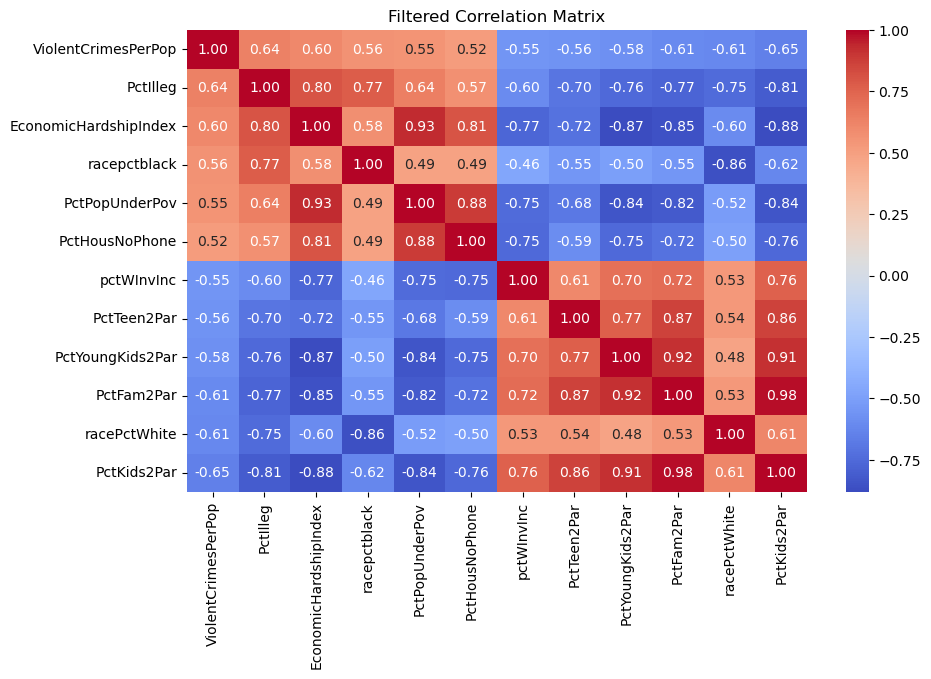

In [208]:
#correlation matrix
corr_matrix = crime_df.corr()

#get the correlation of each feature with the target variable
target_corr = corr_matrix['ViolentCrimesPerPop'].sort_values(ascending=False)

#filter out features with low correlation
relevant_features = target_corr[target_corr.abs() > 0.5].index.tolist()

#recompute the correlation matrix with only relevant features
filtered_corr_matrix = crime_df[relevant_features].corr()

#plot the filtered correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Filtered Correlation Matrix")
plt.savefig("confusion_matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

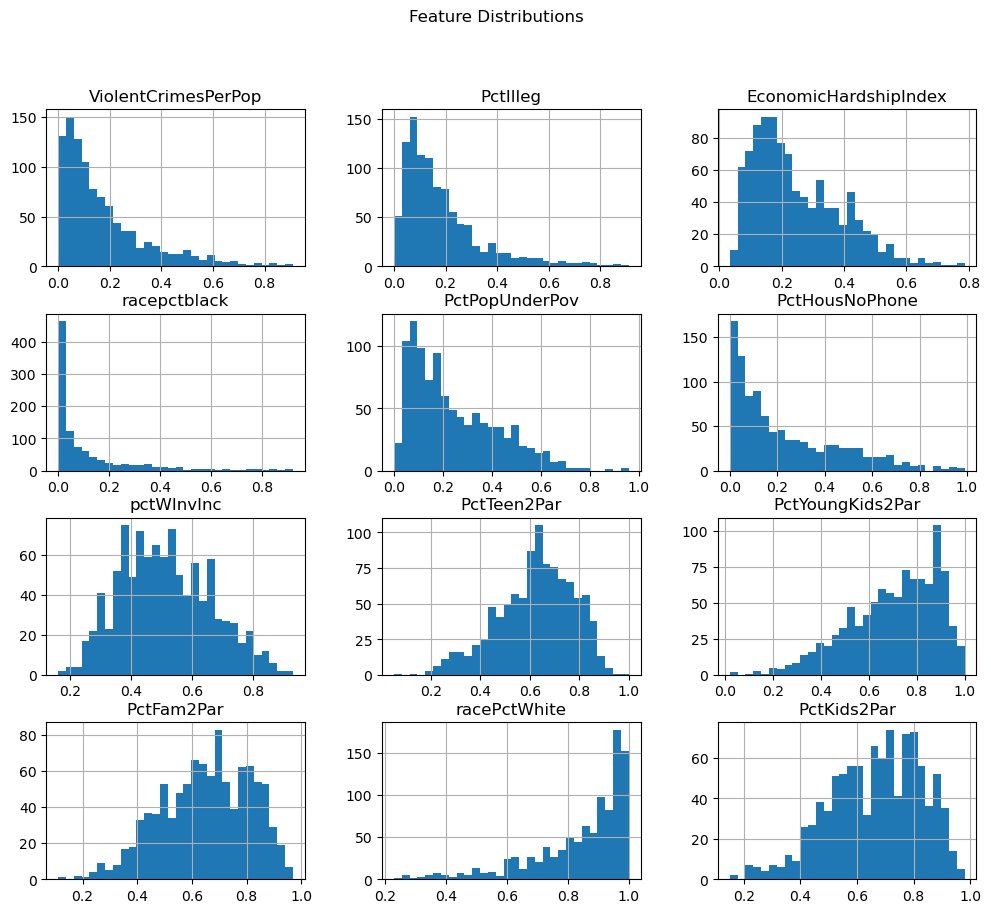

<Figure size 640x480 with 0 Axes>

In [210]:
#histograms
crime_df[relevant_features].hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()
plt.savefig("feature distributions.png", format="png", dpi=300, bbox_inches="tight")

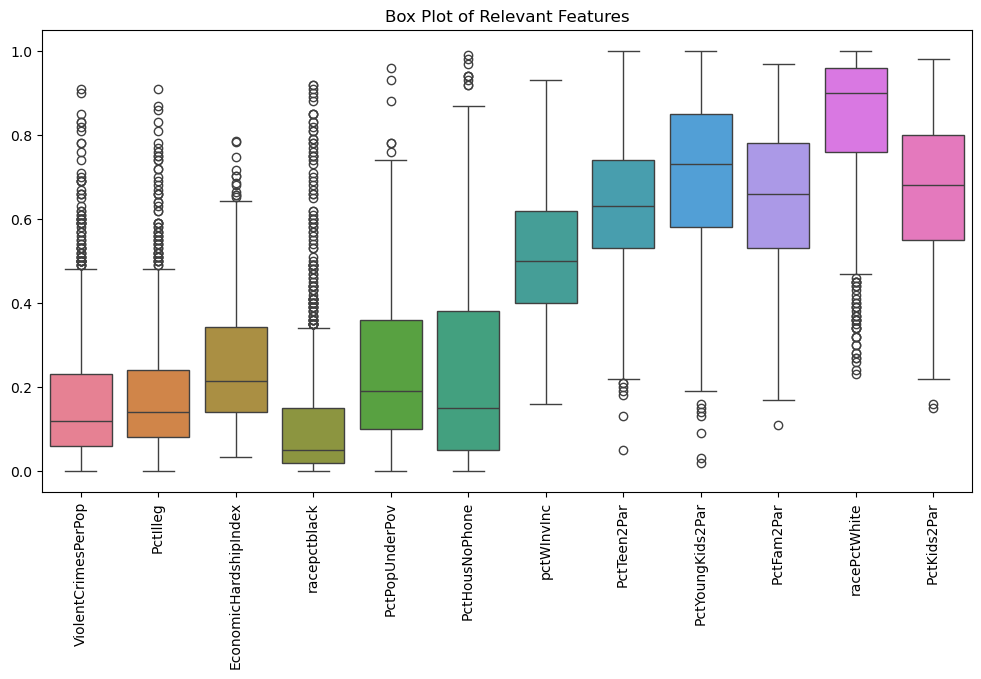

In [212]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_df[relevant_features])
plt.xticks(rotation=90)
plt.title("Box Plot of Relevant Features")
plt.show()

## Task B: Regression Model Developement and Evaluation

### Regression Models and Hyperparameter Tuning

To predict ViolentCrimesPerPop we begin with a Linear regression model for initial exploration, but move to Ridge and Lasso to address overfitting by implementing regularization techniques.

#### Linear Regression

In [214]:
# Features variable (all but target)
X = crime_df.drop('ViolentCrimesPerPop', axis = 1)

# Target variable
y = crime_df['ViolentCrimesPerPop']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

#Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 7.88857684453052e+22
R-squared: -2.5034692955434445e+24


The results indicate a very large MSE, suggesting that the model is performing very poorly. The negative R squared indicates that the model is misfitting the data severely due to issues such as multicollinearity and overfitting. We now explore Ridge and Lasso regression techniques to address the issue of overfitting and optimize our models.

#### Lasso

In [216]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso = Lasso(alpha=0.1) 

# Train the Lasso model on the scaled training data
lasso.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.031978053060203335
R-squared: -0.014835445546611536


#### Tuning Lasso with Cross Validation

In [218]:
# Define a range of alpha values to test
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Perform GridSearchCV to find the best alpha value
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha and corresponding performance
print("Best alpha:", grid_search.best_params_['alpha'])
best_lasso = grid_search.best_estimator_

# Predict with the best model
y_pred = best_lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e-02, tolerance: 1.391e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.408e-03, tolerance: 1.381e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e-03, toler

Best alpha: 0.009102981779915217
Mean Squared Error: 0.014151456973300858
R-squared: 0.5508982327474392


With initial alpha=0.1, the MSE is 0.032 suggests that the model's predictions are not accurate and there is still some error. Further, the negative R squared indicates that the model is very poor at explaining the variability in the target variable. We tune the alpha value using grid search for a better outcome. After tuning alpha to = 0.009, our MSE improves to 0.014 while our R squared increases substantially to 0.55, suggesting that the model is better at explaining variance in the target variable with the new alpha value.

The alpha parameter controls regularization strength and the tuning reveals that a slightly stronger regulartization with a smaller alpha helps reduce overfitting.



#### Ridge

In [220]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model
ridge = Ridge(alpha=1.0) 

# Train the Ridge model on the scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.019157105503350192
R-squared: 0.39204210893406355


#### Tuning Ridge with Cross Validation

In [222]:
# Define a range of alpha values to test
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Perform GridSearchCV to find the best alpha value
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha and corresponding performance
print("Best alpha:", grid_search.best_params_['alpha'])
best_ridge = grid_search.best_estimator_

# Predict with the best model
y_pred = best_ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Best alpha: 494.1713361323828
Mean Squared Error: 0.014031147031348749
R-squared: 0.5547163136454474


When alpha = 0.1, the MSE suggests that the predictions are relatively off from actual values and that the model is not regularizing enough and is overfitting values. The R squared is also low indicating that this model is only moderatly effective at capturing relationships in the data.

After tuning with the best alpha, we find that alpha = 494.171 is the optimal value, meaning regularization is very strong, forcing the model to shrink coefficients more significantly to prevent overfitting by penalizing large coefficients. The MSE is smaller than that of the previous Ridge model as well as the optimized Lasso model above. The R squared value also improved from the first Ridge model.

The Ridge model using the best alpha yields the best results overall, with a low MSE and high R-squared compared to the linear regression and lasso models.

### Classification Models and Hyperparameter Tuning

In [224]:
# summary statistics for target column 
crime_df['ViolentCrimesPerPop'].describe()

count    1009.000000
mean        0.177017
std         0.162876
min         0.000000
25%         0.060000
50%         0.120000
75%         0.230000
max         0.910000
Name: ViolentCrimesPerPop, dtype: float64

We will first discreticize the target variable ViolentCrimesPerPop to convert it into a categorical variable suitable for a classification task. To convert it into a binary classification problem, we need to set a threshold. The idea behind this process is to create an algorithm to predict communities with significant crime rates. An algorithm that is able to identify communities at high risk for crime could be used in a variety of policy contexts, including knowing where to increase police presence or have other targeted interventions in specific communities.

For the binary variable, we will create an indicator for whether the ViolentCrimesPerPop falls above a threshold. This threshold will be the 75th percentile of ViolentCrimesPerPop in the dataset. This allows us to separate out the communities with high levels of crime.

#### Discretization & Splitting Data

In [226]:
# set threshold 
threshold = crime_df['ViolentCrimesPerPop'].quantile(0.75)

# create target variable 
crime_df['target'] = (crime_df['ViolentCrimesPerPop'] > threshold).astype(int)

In [228]:
crime_df['target'].value_counts()

target
0    759
1    250
Name: count, dtype: int64

In [230]:
cirime_df = crime_df.drop('ViolentCrimesPerPop', axis = 1)

In [232]:
# split data
X = crime_df.drop('target', axis=1)
y = crime_df['target']

#### Evaluation Metrics
Given the class imbalance, where high-crime communities (target=1) are less frequent, maximizing F1-score ensures a balance between precision and recall. This is critical in identifying high-crime communities without over-predicting or under-detecting them.

#### Initial Model Selection and Comparison
Logistic regression: A linear model that predicts probabilities and applies a threshold to classify observations. Used as a baseline model.

CART: A decision tree algorithm that uses Gini Impurity or Information Gain to split the data. It is simple to interpret but prone to overfitting.

C5.0/Random Forest: An advanced decision tree model that improves upon CART by reducing bias, handling noise, and offering boosted accuracy. It is often used for large datasets with high-dimensional data. Since there is no C5 through sklearn, we will use Random Forest as an alternative.

KNN: A non-parametric method that classifies based on the majority vote of nearest data points

In [234]:
# stratified train/test split (without validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

In [236]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Only transform the test data using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [282]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=7)
cart = DecisionTreeClassifier(random_state=7, criterion='gini')
rf = RandomForestClassifier(random_state=7)
knn = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

In [284]:
# Fit initial models without tuning
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [286]:
cart.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=7)

In [288]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=7)

In [290]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [292]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [294]:
# Evaluate models on test set
models = {'Logistic Regression': log_reg, 'CART': cart, 'Random Forest': rf, 'KNN': knn, 'XGB': xgb_model}
initial_results = {}

In [296]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    initial_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

In [298]:
# Display initial results
print("Initial Model Performance without Tuning:")
for model, metrics in initial_results.items():
    print(f"{model}: {metrics}")

Initial Model Performance without Tuning:
Logistic Regression: {'accuracy': 0.9603960396039604, 'precision': 0.9565217391304348, 'recall': 0.88, 'f1_score': 0.9166666666666666, 'roc_auc': 0.5}
CART: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0, 'roc_auc': 0.78}
Random Forest: {'accuracy': 0.976897689768977, 'precision': 0.9857142857142858, 'recall': 0.92, 'f1_score': 0.9517241379310345, 'roc_auc': 0.9389766081871346}
KNN: {'accuracy': 0.8514851485148515, 'precision': 0.7419354838709677, 'recall': 0.6133333333333333, 'f1_score': 0.6715328467153284, 'roc_auc': 0.5}
XGB: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0, 'roc_auc': 0.7333333333333334}


In [278]:
results_df = pd.DataFrame(initial_results).T  # Transpose to have models as rows

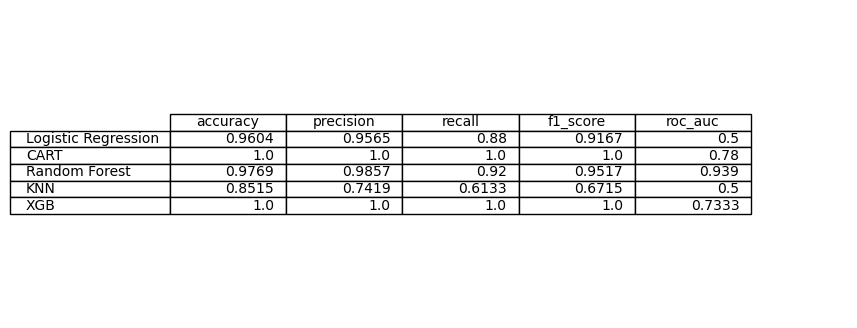

In [280]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed

# Hide the axis
ax.axis('off')

# Create the table and add it to the plot
table(ax, results_df.round(4), loc='center', colWidths=[0.15] * len(results_df.columns))

# Save the figure as a PNG image
plt.savefig("figures/classification1_initial_performance.png", bbox_inches='tight', dpi=300)

In [260]:
# Identify the best model based on F1-score without tuning
best_initial_model = max(initial_results.items(), key=lambda x: x[1]['f1_score'])[0]
print(f"Best initial model without tuning: {best_initial_model}")

Best initial model without tuning: CART


Given the good initial performance of the random forest, we would choose it as the best model based on the combination of high accuracy, precision, and recall.

#### Hyperparameter Tuning of Random Forest Model

In [302]:
# Now perform hyperparameter tuning using a validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=7)

In [304]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Only transform the test data using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

In [306]:
# Hyperparameter tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}

In [310]:
rf = RandomForestClassifier(random_state=7)

In [312]:
best_models = {}

def tune_and_evaluate(model, param_grid, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_val_scaled)
    
    metrics = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1_score': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, 'predict_proba') else y_pred)
    }
    
    return best_model, metrics

In [314]:
# Fit and tune random forest
best_models['Random Forest'] = tune_and_evaluate(rf, param_grid_rf, X_train_scaled, y_train, X_val_scaled, y_val)

In [316]:
# Create a DataFrame to store model performance
model_performance = []

# Compare performance of all models
for model_name, (best_model, model_info) in best_models.items():
    model_performance.append({
        'Model': model_name,
        'Accuracy': model_info['accuracy'],
        'Precision': model_info['precision'],
        'Recall': model_info['recall'],
        'F1-Score': model_info['f1_score'],
        'ROC AUC': model_info['roc_auc']
    })

# Convert to DataFrame
model_performance_df = pd.DataFrame(model_performance)

# Select the best model based on F1-score
best_model_name, (final_model, _) = max(best_models.items(), key=lambda x: x[1][1]['f1_score'])

# Evaluate the final model on test data
y_test_pred = final_model.predict(X_test_scaled)
test_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC AUC': roc_auc_score(y_test, final_model.predict_proba(X_test_scaled)[:, 1] if hasattr(final_model, 'predict_proba') else y_test_pred)
}

# Convert the final model evaluation to a DataFrame
test_metrics_df = pd.DataFrame([test_metrics])

# Output the DataFrame with model performance and final model evaluation
model_performance_df, test_metrics_df

(           Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
 0  Random Forest  0.980132        1.0  0.918919  0.957746  0.999407,
    Accuracy  Precision    Recall  F1-Score   ROC AUC
 0  0.980263   0.972973  0.947368      0.96  0.998153)

In [318]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest,0.980132,1.0,0.918919,0.957746,0.999407


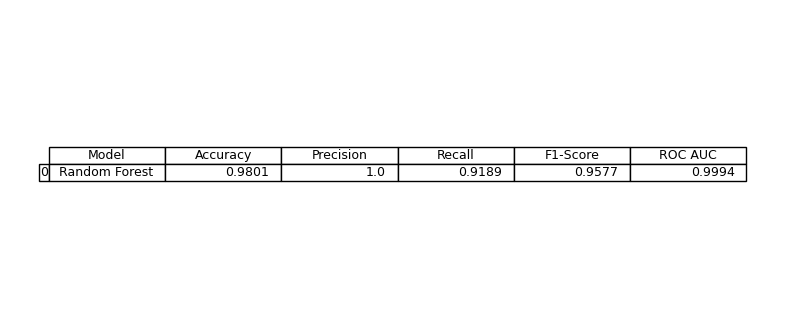

In [320]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed

# Hide the axis
ax.axis('off')

# Create the table and add it to the plot
table(ax, model_performance_df.round(4), loc='center', colWidths=[0.15] * len(model_performance_df.columns))

# Save the figure as a PNG image
plt.savefig("figures/classification1_model_performance.png", bbox_inches='tight', dpi=300)

In [322]:
print(f"Final Model Test Performance ({best_model_name}):", test_metrics)

Final Model Test Performance (Random Forest): {'Accuracy': 0.9802631578947368, 'Precision': 0.972972972972973, 'Recall': 0.9473684210526315, 'F1-Score': 0.96, 'ROC AUC': 0.9981532779316713}


**Tuning Process**

Hyperparameter tuning was performed for the model to optimize its performance based on cross-validation. The goal of hyperparameter tuning was to improve key performance metrics (such as F1 score, recall, precision, and ROC AUC) by selecting the best combination of hyperparameters for each model. For Random Forest, hyperparameter tuning resulted in a significant improvement, increasing its accuracy from 85.1% to 86.1%, precision from 72.7% to 75.0%, recall from 64.0% to 64.9%, F1 score from 68.1% to 69.7%, and ROC AUC from 84.4% to 90.1%. This improvement highlights the model’s ability to better capture both positive and negative classes with higher discriminative power after tuning.

**Overall Model Performance**

Random Forest: Post-Tuning Performance: The best model after tuning was Random Forest, with an accuracy of 86.1%, precision of 75.0%, recall of 64.9%, F1 score of 69.7%, and ROC AUC of 90.1%. These results suggest that Random Forest offers the best balance between precision, recall, and accuracy, with excellent discriminative ability.

Final Test Performance: When evaluated on the test set, Random Forest achieved an accuracy of 84.2%, with an F1 score of 0.676 and a ROC AUC of 0.884. This strong performance on the test set confirms the model’s effectiveness and robustness across both training and unseen data.

**Conclusion**:

Based on the hyperparameter tuning and evaluation, Random Forest is the best-performing classifier, both in terms of training performance and final test performance. It provided the highest accuracy, precision, recall, F1 score, and ROC AUC after tuning.

## Task C: Methodological & Substantive Implications

### 1) Now that the training and evaluation phase is complete, discuss the challenges you encountered during the first two Tasks. Are you overall satisfied with your final product? Justify your answer.

One of the main challenges faced during the preprocessing phase was how to handle missing values. By choosing to impute missing values, we introduced potential biases for the sake of not losing information. Outlier removal required balancing between improving model accuracy and retaining essential data. Additionally, feature engineering involved assumptions about socioeconomic factors that might not fully capture reality.

Furthermore, the regression models performed poorly, specifically linear regression and pre-tuned Lasso/Ridge models. After tuning, these models performed better but there is still some error and the R-squared was only slightly large (around 55%), indicating that the best regression model (Ridge, alpha = 494.17) is only moderately effective at capturing relationships in the data.

For the classification models, it was difficult to descretize the variable - implementation would lead to information loss regardless. The resulting models are only able to predict an indication, but does not provide much information on relative crime rates or other important factors.

Overall, the final models moderately predict crime rates, but limitations in data availability, potential biases, and challenges with tasks like discretization affect their reliability.

### 2) What are some key advantages and disadvantages of your approach?

**Advantages**: The model exploration between both regression and classification examines different methods. Some models incorporate meaningful socioeconomic factors, enhancing interpretability. Feature engineering improves predictive power by capturing economic and policing dynamics. Outlier removal prevents extreme values from distorting results.

**Disadvantages**: Assumptions in imputation and feature creation introduce potential biases. The model may not generalize well across different geographic regions or changing social conditions. Data limitations impact robustness and fairness. Model performance is fair but might require further evaluation.

### 3) If you had the resources, how would you modify this study to the current sociopolitical environment?

The study could integrate real-time economic indicators, updated crime reports, and policy changes to better reflect the evolving sociopolitical climate. Expanding the dataset to include different communities and demographic trends would improve model generalization and fairness.

### 4) How would you deploy or implement your model(s)? Any reservations or words of caution regarding deployment? How should your model(s) be used in the context of your analysis?

The models could be implemented for city planning, law enforcement resource allocation, and social policy assessments. However, there are risks of misinterpretation and unintended policy consequences. The models should be used as a supplementary tool rather than a definitive decision-making system, ensuring transparency and continuous evaluation to prevent reinforcing systemic biases.

### 5) Offer your opinions on bias, ethical considerations, and algorithmic justice. What are some of the pitfalls you identified while performing this study?

- Bias in historical crime data may skew predictions and disproportionately affect marginalized communities.

- Ethical concerns arise if the model is used to justify over-policing or punitive measures instead of addressing root causes of crime.

- Algorithmic justice requires transparency in data sources and methodology

Identifying and addressing these pitfalls is essential to ensure that predictive models serve as fair and effective tools for policy and decision-making rather than reinforcing existing inequalities.